<a href="https://colab.research.google.com/github/redhead1999/cloud_comp_lab4/blob/master/StockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#install the dependencies
import numpy as np
import pandas as pd
from  sklearn.tree import DecisionTreeRegressor
from  sklearn.linear_model import LinearRegression
from  sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [90]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG.csv


In [91]:
#store the data into a data feame
df = pd.read_csv('GOOG.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-23,1271.550049,1293.310059,1265.670044,1276.310059,1276.310059,1566200
1,2020-04-24,1261.170044,1280.400024,1249.449951,1279.310059,1279.310059,1639600
2,2020-04-27,1296.000000,1296.150024,1269.000000,1275.880005,1275.880005,1600600
3,2020-04-28,1287.930054,1288.050049,1232.199951,1233.670044,1233.670044,2951300
4,2020-04-29,1341.459961,1359.989990,1325.339966,1341.479980,1341.479980,3793600
5,2020-04-30,1324.880005,1352.819946,1322.489990,1348.660034,1348.660034,2668900


In [92]:
#get the number of trading days
df.shape

(253, 7)

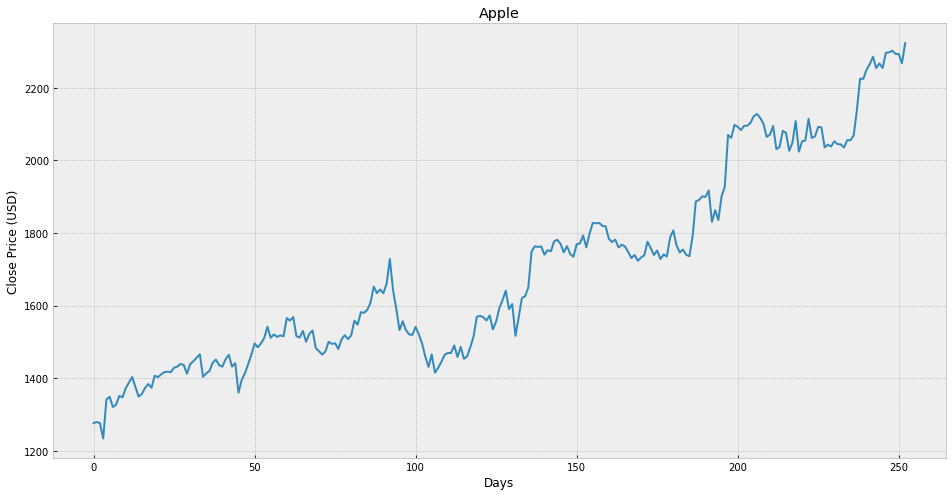

In [93]:
#visualise cloe price data
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Close Price (USD)')
plt.plot(df['Close'])
plt.show()

In [94]:
#get the close price
df = df[['Close']]
df.head(4)

,Close
0,1276.310059
1,1279.310059
2,1275.880005
3,1233.670044


In [95]:
#create the variable to predict the 'x' days out into the futute
future_days = 25
#create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
249,2293.629883,NaN
250,2293.290039,NaN
251,2267.919922,NaN
252,2323.159912,NaN


In [96]:
#create the future data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[1276.310059]
 [1279.310059]
 [1275.880005]
 [1233.670044]
 [1341.47998 ]
 [1348.660034]
 [1320.609985]
 [1326.800049]
 [1351.109985]
 [1347.300049]
 [1372.560059]
 [1388.369995]
 [1403.26001 ]
 [1375.73999 ]
 [1349.329956]
 [1356.130005]
 [1373.189941]
 [1383.939941]
 [1373.484985]
 [1406.719971]
 [1402.800049]
 [1410.420044]
 [1417.02002 ]
 [1417.839966]
 [1416.72998 ]
 [1428.920044]
 [1431.819946]
 [1439.219971]
 [1436.380005]
 [1412.180054]
 [1438.390015]
 [1446.609985]
 [1456.160034]
 [1465.849976]
 [1403.839966]
 [1413.180054]
 [1419.849976]
 [1442.719971]
 [1451.119995]
 [1435.959961]
 [1431.719971]
 [1451.859985]
 [1464.410034]
 [1431.969971]
 [1441.329956]
 [1359.900024]
 [1394.969971]
 [1413.609985]
 [1438.040039]
 [1464.699951]
 [1495.699951]
 [1485.180054]
 [1496.      ]
 [1510.98999 ]
 [1541.73999 ]
 [1511.339966]
 [1520.579956]
 [1513.640015]
 [1518.      ]
 [1515.550049]
 [1565.719971]
 [1558.420044]
 [1568.48999 ]
 [1515.680054]
 [1511.869995]
 [1530.199951]
 [1500.339

In [97]:
#create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)


[1428.920044 1431.819946 1439.219971 1436.380005 1412.180054 1438.390015
 1446.609985 1456.160034 1465.849976 1403.839966 1413.180054 1419.849976
 1442.719971 1451.119995 1435.959961 1431.719971 1451.859985 1464.410034
 1431.969971 1441.329956 1359.900024 1394.969971 1413.609985 1438.040039
 1464.699951 1495.699951 1485.180054 1496.       1510.98999  1541.73999
 1511.339966 1520.579956 1513.640015 1518.       1515.550049 1565.719971
 1558.420044 1568.48999  1515.680054 1511.869995 1530.199951 1500.339966
 1522.02002  1531.449951 1482.959961 1474.449951 1464.969971 1473.609985
 1500.099976 1494.48999  1496.099976 1480.319946 1506.619995 1518.449951
 1507.72998  1517.97998  1558.599976 1547.530029 1581.75     1580.420044
 1588.199951 1608.219971 1652.380005 1634.329956 1644.410034 1634.180054
 1660.709961 1728.280029 1641.839966 1591.040039 1532.390015 1556.959961
 1532.02002  1520.719971 1519.280029 1541.439941 1520.900024 1495.530029
 1459.98999  1431.160034 1465.459961 1415.209961 142

In [98]:
#split the data intop 75% - training and 25% - testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [99]:
#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [100]:
#get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[2095.889893],
       [2104.110107],
       [2121.899902],
       [2128.310059],
       [2117.199951],
       [2101.139893],
       [2064.879883],
       [2070.860107],
       [2095.169922],
       [2031.359985],
       [2036.859985],
       [2081.51001 ],
       [2075.840088],
       [2026.709961],
       [2049.090088],
       [2108.540039],
       [2024.170044],
       [2052.699951],
       [2055.030029],
       [2114.77002 ],
       [2061.919922],
       [2066.48999 ],
       [2092.52002 ],
       [2091.080078],
       [2036.219971]])

In [101]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[2043.199951 2038.589966 2052.959961 2045.060059 2044.359985 2035.550049
 2055.949951 2055.540039 2068.629883 2323.159912 2225.550049 2091.080078
 2249.679932 2323.159912 2285.879883 2038.589966 2323.159912 2254.840088
 2296.659912 2297.76001  2302.399902 2293.629883 2092.52002  2267.919922
 2323.159912]

[2186.54280254 2194.61316074 2212.07864495 2218.37194376 2207.4643748
 2191.69709421 2156.09810996 2161.96931352 2185.83595673 2123.18928502
 2128.58901915 2172.4250671  2166.85850868 2118.6240317  2140.59616543
 2198.96233437 2116.13041779 2144.14022005 2146.42782036 2205.07874183
 2153.19210951 2157.67886445 2183.23436286 2181.82067124 2127.96067271]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


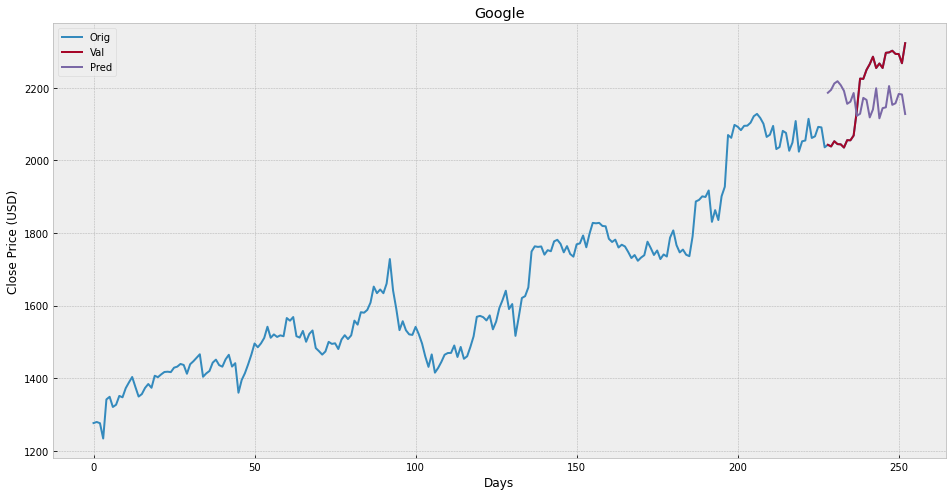

In [103]:
#visualise the data
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Close Price (USD)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show() 

In [ ]:
# RED - ACTUAL
# PURPLE - PREDICTION